# Support Vector Machine

## Reading the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as cv
from pandas.plotting import scatter_matrix

data = pd.read_csv('bank-additional-full.csv', sep=',', na_values='.')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [2]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39186,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
39187,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39188,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39189,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# Constructing new column
data["was_contacted"] = np.where(data["pdays"] < 100, True, False)
data = data.drop(['pdays'], axis=1)

In [5]:
# Transform the y column into Boolean
data.y = pd.Series(np.where(data.y.values == 'yes', True, False), data.index)

In [6]:
# Separate categorical columns into numeric ones...
dummy = pd.get_dummies(data)
data = dummy
data.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'was_contacted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

## Separating data and labels

In [7]:
# Get training data and class column
X = data.drop(['y'], axis=1).values
y = data.y.values.astype(int)

print(X.shape)
print(y.shape)

(39191, 60)
(39191,)


In [8]:
data.describe(include='all')

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.00000,39191.000000,39191.000000,39191.000000,39191,...,39191,39191,39191,39191,39191,39191,39191,39191,39191,39191
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,True,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34831,...,38513,38675,31774,31084,30997,31508,31401,35147,33877,37921
mean,39.858003,257.995509,2.566380,0.170422,0.083238,93.57172,-40.537146,3.623633,5167.404340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.288300,259.728574,2.772109,0.488258,1.566502,0.57705,4.621895,1.730493,71.787741,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.20100,-50.800000,0.634000,4963.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.07500,-42.700000,1.344000,5099.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,38.000000,179.000000,2.000000,0.000000,1.100000,93.44400,-41.800000,4.857000,5191.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.99400,-36.400000,4.961000,5228.100000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in range(60):
    print('std:',X[:,i].std(),'min',X[:,i].min(),'max',X[:,i].max())

std: 10.28816861224553 min 17 max 98
std: 259.7252599689887 min 0 max 4918
std: 2.7720738473606157 min 1 max 56
std: 0.48825225686711266 min 0 max 7
std: 1.5664821840190177 min -3.4 max 1.4
std: 0.5770423960865926 min 92.201 max 94.767
std: 4.621835748047421 min -50.8 max -26.9
std: 1.730470588844565 min 0.634 max 5.045
std: 71.78682547940478 min 4963.6 max 5228.1
std: 0.18553354814546566 min False max True
std: 0.43820528657815855 min False max True
std: 0.4170776316592573 min False max True
std: 0.1853418693052726 min False max True
std: 0.15883341992318506 min False max True
std: 0.25748174199921087 min False max True
std: 0.19888974015592514 min False max True
std: 0.1847654494015846 min False max True
std: 0.29639065058998115 min False max True
std: 0.13309552840602595 min False max True
std: 0.37240771251437005 min False max True
std: 0.156916501939839 min False max True
std: 0.3162311733126127 min False max True
std: 0.48864449535095883 min False max True
std: 0.4496530325755551

# Training of SVM without oversampling
Due to the high difference of classes for y, we might wwant to oversample the training data. But we will first train the SVM models with the different kernels and compare them with the respective training with oversampled training data.

In [10]:
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.3, stratify = y,random_state=1)

# Data normalization
SKlearn documentation **highly** recommends normalize the data into a range of [-1, 1]. 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler().fit(X_train)
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

# Apply the normalization trained in training data in both training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear SVM

In [12]:
from sklearn.svm import SVC
from sklearn import metrics

linear_knc = SVC(kernel='linear')
linear_knc.fit(X_train, y_train)
linear_pred = linear_knc.predict(X_test)
print("Confusion matrix on test set:\n",metrics.confusion_matrix(y_test, linear_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, linear_pred))

Confusion matrix on test set:
 [[10199   251]
 [  860   448]]

Accuracy on test set:  0.9055111413505699


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10450
           1       0.64      0.34      0.45      1308

    accuracy                           0.91     11758
   macro avg       0.78      0.66      0.70     11758
weighted avg       0.89      0.91      0.89     11758



## Finding the best parameters of C

In [14]:
from sklearn.model_selection import GridSearchCV

# Parameter sets
Cs     = np.logspace(0, 2, num=3, base=10.0)
gammas = np.logspace(-3, -1, num=3, base=10.0)

cache_size = 3500
print("C params:", Cs)
print("gamma params:", gammas)

C params: [  1.  10. 100.]
gamma params: [0.001 0.01  0.1  ]


In [15]:
import joblib
import os

params = {'C': Cs, 'kernel': ['linear'] }

if os.path.isfile('trained/svc_linear.plk'):
    grid_clf = joblib.load('trained/svc_linear.plk')
else:
    grid_clf = GridSearchCV(SVC(cache_size=cache_size), params)
    grid_clf.fit(X_train, y_train)
    joblib.dump(grid_clf, 'trained/svc_linear.plk')

bestparams = grid_clf.best_params_

print("\nBest value of parameter C found:", bestparams['C'])


Best value of parameter C found: 100.0


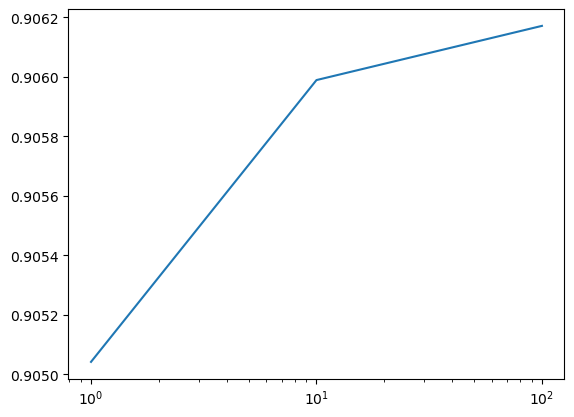

In [16]:
# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_clf.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

In [17]:
# Training model with the best parameters
linear_svc = SVC(C=bestparams['C'], kernel='linear')
linear_svc.fit(X_train, y_train)

linear_pred = linear_svc.predict(X_test)

print("Confusion matrix on test set:\n", metrics.confusion_matrix(y_test, linear_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, linear_pred))
print("\nNumber of supports: ",np.sum(linear_svc.n_support_), "(",np.sum(np.abs(linear_svc.dual_coef_)==bestparams['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(linear_svc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[10196   254]
 [  853   455]]

Accuracy on test set:  0.9058513352610988

Number of supports:  5442 ( 5385 of them have slacks)
Prop. of supports:  0.19837422082892867


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10450
           1       0.64      0.35      0.45      1308

    accuracy                           0.91     11758
   macro avg       0.78      0.66      0.70     11758
weighted avg       0.89      0.91      0.89     11758



## Polynomic SVM

In [19]:
from sklearn.svm import SVC
from sklearn import metrics

poly_knc = SVC(kernel='poly')
poly_knc.fit(X_train, y_train)
poly_pred = poly_knc.predict(X_test)
print("Confusion matrix on test set:\n",metrics.confusion_matrix(y_test, poly_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, poly_pred))

Confusion matrix on test set:
 [[10217   233]
 [  891   417]]

Accuracy on test set:  0.9044055111413506


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10450
           1       0.64      0.32      0.43      1308

    accuracy                           0.90     11758
   macro avg       0.78      0.65      0.69     11758
weighted avg       0.89      0.90      0.89     11758



## Finding the best parameters of C and gamma

In [21]:
from sklearn.model_selection import GridSearchCV

# Parameter sets
Cs     = np.logspace(0, 3, num=4, base=10.0)
gammas = np.logspace(-4, -1, num=4, base=10.0)

cache_size = 3500
print("C params:", Cs)
print("gamma params:", gammas)

C params: [   1.   10.  100. 1000.]
gamma params: [0.0001 0.001  0.01   0.1   ]


In [22]:
import os
import joblib

params = {'C'      : Cs, 
          'gamma'  : gammas,
          'degree' : [2, 3],
          'kernel' : ['poly'] }

if os.path.isfile('trained/svc_poly.plk'):
    grid_clf = joblib.load('trained/svc_poly.plk')
else:
    grid_clf = GridSearchCV(SVC(cache_size=cache_size), params)
    grid_clf.fit(X_train, y_train)
    joblib.dump(grid_clf, 'trained/svc_poly.plk')

bestparams = grid_clf.best_params_

print("\nBest value of parameter C found:     ", bestparams['C'])
print("\nBest value of parameter gamma found: ", bestparams['gamma'])
print("\nBest value of parameter degree found:", bestparams['degree'])


Best value of parameter C found:      1.0

Best value of parameter gamma found:  0.1

Best value of parameter degree found: 2


Text(0, 0.5, 'gamma')

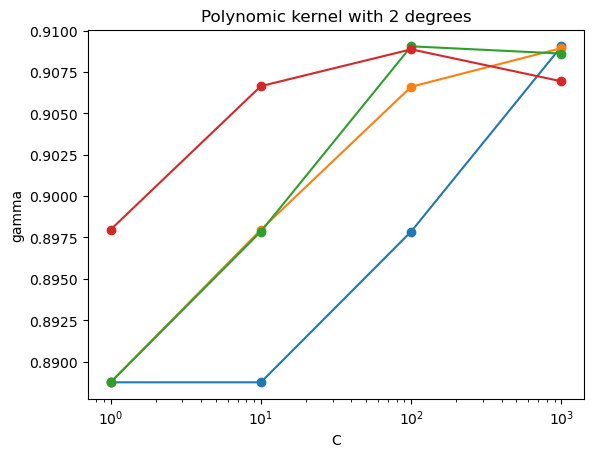

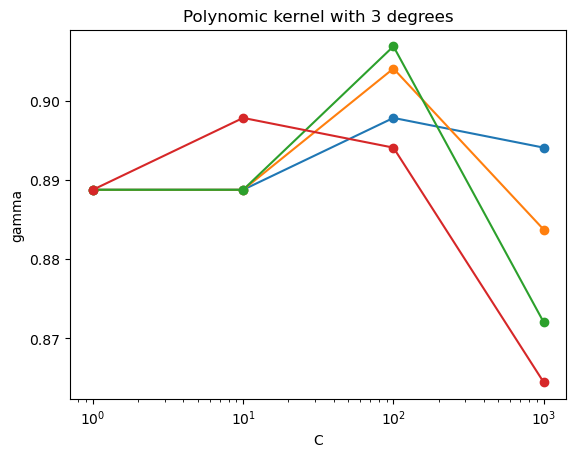

In [23]:
# Let's plot the 10-fold cross.validation accuracy deppending on C
results = pd.DataFrame(grid_clf.cv_results_)

degree2 = results[results.param_degree == 2]['mean_test_score']
degree3 = results[results.param_degree == 3]['mean_test_score']

degree2 = np.array(degree2).reshape(len(Cs), len(gammas))
degree3 = np.array(degree3).reshape(len(Cs), len(gammas))

# Plot Grid search scores
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

for idx, val in enumerate(gammas):
    ax1.semilogx(Cs, degree2[idx,:], '-o', label='Gammas' + ': ' + str(val))
ax1.set_title('Polynomic kernel with 2 degrees')
ax1.set_xlabel('C')
ax1.set_ylabel('gamma')

for idx, val in enumerate(gammas):
    ax2.semilogx(Cs, degree3[idx,:], '-o', label='Gammas' + ': ' + str(val))
ax2.set_title('Polynomic kernel with 3 degrees')
ax2.set_xlabel('C')
ax2.set_ylabel('gamma')

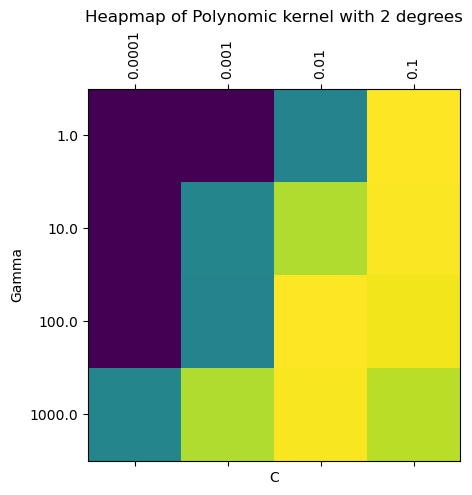

In [24]:
plt.matshow(degree2)
plt.xticks(np.arange(len(gammas)), gammas,rotation='vertical')
plt.yticks(np.arange(len(Cs)), Cs)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Heapmap of Polynomic kernel with 2 degrees')
plt.show()

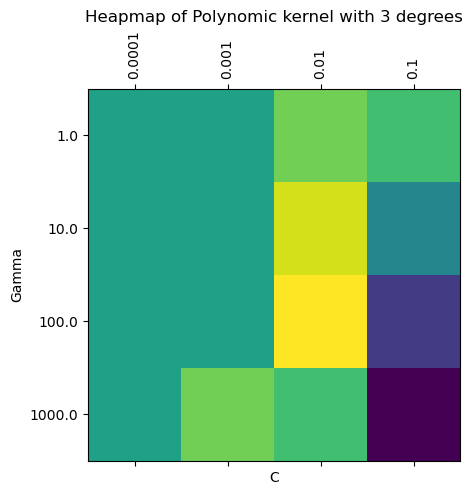

In [25]:
plt.matshow(degree3)
plt.xticks(np.arange(len(gammas)), gammas,rotation='vertical')
plt.yticks(np.arange(len(Cs)), Cs)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Heapmap of Polynomic kernel with 3 degrees')
plt.show()

In [26]:
# Training model with the best parameters
poly_svc = SVC(C=bestparams['C'], gamma=bestparams['gamma'], degree=bestparams['degree'], kernel='poly')
poly_svc.fit(X_train, y_train)

poly_pred = poly_svc.predict(X_test)

print("Confusion matrix on test set:\n", metrics.confusion_matrix(y_test, poly_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, poly_pred))
print("\nNumber of supports: ",np.sum(poly_svc.n_support_), "(",np.sum(np.abs(poly_svc.dual_coef_)==bestparams['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(poly_svc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[10126   324]
 [  773   535]]

Accuracy on test set:  0.9067018200374213

Number of supports:  5343 ( 4637 of them have slacks)
Prop. of supports:  0.19476542849852368


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10450
           1       0.62      0.41      0.49      1308

    accuracy                           0.91     11758
   macro avg       0.78      0.69      0.72     11758
weighted avg       0.90      0.91      0.90     11758



## RBF SVM

In [28]:
from sklearn.svm import SVC
from sklearn import metrics

rbf_knc = SVC(kernel='rbf')
rbf_knc.fit(X_train, y_train)
rbf_pred = rbf_knc.predict(X_test)
print("Confusion matrix on test set:\n",metrics.confusion_matrix(y_test, rbf_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, rbf_pred))

Confusion matrix on test set:
 [[10311   139]
 [ 1013   295]]

Accuracy on test set:  0.9020241537676476


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10450
           1       0.68      0.23      0.34      1308

    accuracy                           0.90     11758
   macro avg       0.80      0.61      0.64     11758
weighted avg       0.88      0.90      0.88     11758



## Finding the best parameters of C and gamma

In [30]:
from sklearn.model_selection import GridSearchCV

# Parameter sets
Cs     = np.logspace(0, 4, num=5, base=10.0)
gammas = np.logspace(-5, -1, num=5, base=10.0)

cache_size = 3500
print("C params:", Cs)
print("gamma params:", gammas)

C params: [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
gamma params: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


In [31]:
params = {'C'      : Cs, 
          'gamma'  : gammas,
          'kernel' : ['rbf'] }

if os.path.isfile('trained/svc_rbf.plk'):
    grid_clf = joblib.load('trained/svc_rbf.plk')
else:
    grid_clf = GridSearchCV(SVC(cache_size=cache_size), params)
    grid_clf.fit(X_train, y_train)
    joblib.dump(grid_clf, 'trained/svc_rbf.plk')

bestparams = grid_clf.best_params_

print("\nBest value of parameter C found:    ", bestparams['C'])
print("\nBest value of parameter gamma found:", bestparams['gamma'])


Best value of parameter C found:     1000.0

Best value of parameter gamma found: 0.001


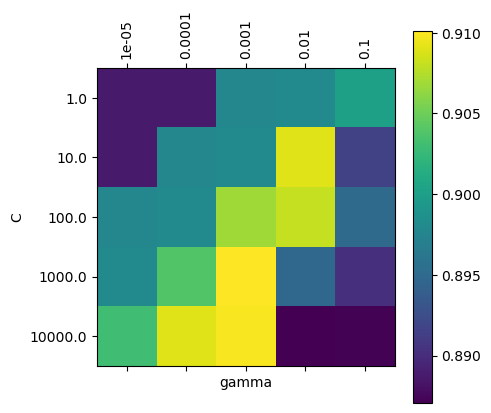

In [32]:
# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_clf.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(Cs), len(gammas))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gammas)), gammas,rotation='vertical')
plt.yticks(np.arange(len(Cs)), Cs)
plt.show()

In [33]:
# Training model with the best parameters
rbf_svc = SVC(C=bestparams['C'], gamma=bestparams['gamma'], kernel='rbf')
rbf_svc.fit(X_train, y_train)

rbf_pred = rbf_svc.predict(X_test)

print("Confusion matrix on test set:\n", metrics.confusion_matrix(y_test, rbf_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, rbf_pred))
print("\nNumber of supports: ",np.sum(rbf_svc.n_support_), "(",np.sum(np.abs(rbf_svc.dual_coef_)==bestparams['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(rbf_svc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[10169   281]
 [  786   522]]

Accuracy on test set:  0.9092532743663888

Number of supports:  5415 ( 4826 of them have slacks)
Prop. of supports:  0.1973900047388182


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10450
           1       0.65      0.40      0.49      1308

    accuracy                           0.91     11758
   macro avg       0.79      0.69      0.72     11758
weighted avg       0.90      0.91      0.90     11758



# Training of SVM model with oversampled data

In [35]:
from imblearn.over_sampling import SMOTE, ADASYN

X_SMOTE,  y_SMOTE  =  SMOTE().fit_resample(X_train, y_train)
X_ADASYN, y_ADASYN = ADASYN().fit_resample(X_train, y_train)

/home/ahkdel/.local/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/ahkdel/.local/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/ahkdel/.local/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. U

# Data normalization
SKlearn documentation **highly** recommends normalize the data into a range of [-1, 1]. 

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler().fit(X_train)
scaler_SMOTE  = MinMaxScaler(feature_range=(-1, 1)).fit(X_SMOTE)
scaler_ADASYN = MinMaxScaler(feature_range=(-1, 1)).fit(X_ADASYN)

# Apply the normalization trained in training data in both training and test sets
X_SMOTE  =  scaler_SMOTE.transform(X_SMOTE)
X_ADASYN = scaler_ADASYN.transform(X_ADASYN)

## Linear SVM with SMOTE oversampled training data

In [37]:
from sklearn.svm import SVC
from sklearn import metrics

linear_SMOTE_knc = SVC(kernel='linear')
linear_SMOTE_knc.fit(X_SMOTE, y_SMOTE)
linear_SMOTE_pred = linear_SMOTE_knc.predict(X_test)

SMOTE_accuracy = metrics.accuracy_score(y_test, linear_SMOTE_pred)
print("Confusion matrix on test set:\n",metrics.confusion_matrix(y_test, linear_SMOTE_pred))
print("\nAccuracy on test set: ", SMOTE_accuracy)

Confusion matrix on test set:
 [[8819 1631]
 [ 125 1183]]

Accuracy on test set:  0.8506548732777683


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, linear_SMOTE_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10450
           1       0.42      0.90      0.57      1308

    accuracy                           0.85     11758
   macro avg       0.70      0.87      0.74     11758
weighted avg       0.92      0.85      0.87     11758



## Linear SVM with ADASYN oversampled training data

In [39]:
from sklearn.svm import SVC
from sklearn import metrics

linear_ADASYN_knc = SVC(kernel='linear')
linear_ADASYN_knc.fit(X_ADASYN, y_ADASYN)
linear_ADASYN_pred = linear_ADASYN_knc.predict(X_test)

ADASYN_accuracy = metrics.accuracy_score(y_test, linear_ADASYN_pred)
print("Confusion matrix on test set:\n",metrics.confusion_matrix(y_test, linear_ADASYN_pred))
print("\nAccuracy on test set: ", ADASYN_accuracy)

Confusion matrix on test set:
 [[8726 1724]
 [ 109 1199]]

Accuracy on test set:  0.844106140500085


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, linear_ADASYN_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.90     10450
           1       0.41      0.92      0.57      1308

    accuracy                           0.84     11758
   macro avg       0.70      0.88      0.74     11758
weighted avg       0.92      0.84      0.87     11758



In [41]:
if ADASYN_accuracy > SMOTE_accuracy:
    X_train = X_ADASYN
    y_train = y_ADASYN
    oversample = 'ADASYN'
else:
    X_train = X_SMOTE
    y_train = y_SMOTE
    oversample = 'SMOTE'

## Finding the best parameters of C for linear SVM with oversampled data

In [42]:
from sklearn.model_selection import GridSearchCV

# Parameter sets
Cs     = np.logspace(0, 3, num=4, base=10.0)
gammas = np.logspace(-4, -1, num=4, base=10.0)

cache_size = 3500
print("C params:", Cs)
print("gamma params:", gammas)

C params: [   1.   10.  100. 1000.]
gamma params: [0.0001 0.001  0.01   0.1   ]


In [43]:
import joblib
import os

params = {'C': Cs, 'kernel': ['linear'] }

if os.path.isfile('trained/svc_linear_'+oversample+'.plk'):
    grid_clf = joblib.load('trained/svc_linear_'+oversample+'.plk')
else:
    grid_clf = GridSearchCV(SVC(cache_size=cache_size), params)
    grid_clf.fit(X_train, y_train)
    joblib.dump(grid_clf, 'trained/svc_linear_'+oversample+'.plk')

bestparams = grid_clf.best_params_

print("\nBest value of parameter C found:", bestparams['C'])


Best value of parameter C found: 10.0


/home/ahkdel/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ahkdel/.local/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


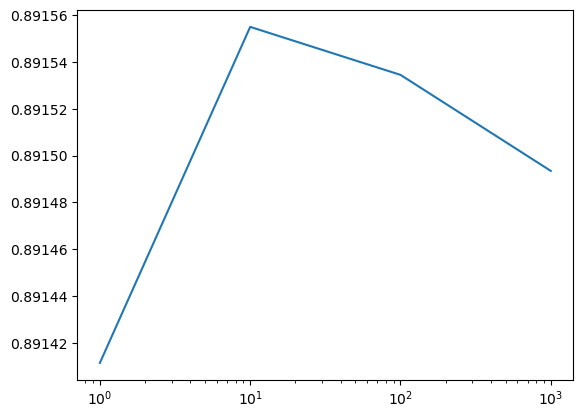

In [44]:
# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_clf.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

In [45]:
# Training model with the best parameters
linear_os_svc = SVC(C=bestparams['C'], kernel='linear')
linear_os_svc.fit(X_train, y_train)

linear_os_pred = linear_os_svc.predict(X_test)

print("Confusion matrix on test set:\n", metrics.confusion_matrix(y_test, linear_os_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, linear_os_pred))
print("\nNumber of supports: ",np.sum(linear_os_svc.n_support_), "(",np.sum(np.abs(linear_os_svc.dual_coef_)==bestparams['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(linear_os_svc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[8822 1628]
 [ 126 1182]]

Accuracy on test set:  0.8508249702330328

Number of supports:  14328 ( 14261 of them have slacks)
Prop. of supports:  0.2938353636028055


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, linear_os_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10450
           1       0.42      0.90      0.57      1308

    accuracy                           0.85     11758
   macro avg       0.70      0.87      0.74     11758
weighted avg       0.92      0.85      0.87     11758



## Polynomic SVM with oversampled data

In [47]:
from sklearn.svm import SVC
from sklearn import metrics

poly_os_knc = SVC(kernel='poly')
poly_os_knc.fit(X_train, y_train)
poly_os_pred = poly_os_knc.predict(X_test)
print("Confusion matrix on test set:\n",metrics.confusion_matrix(y_test, poly_os_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, poly_os_pred))

Confusion matrix on test set:
 [[9438 1012]
 [ 348  960]]

Accuracy on test set:  0.8843340704201395


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, poly_os_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     10450
           1       0.49      0.73      0.59      1308

    accuracy                           0.88     11758
   macro avg       0.73      0.82      0.76     11758
weighted avg       0.91      0.88      0.89     11758



## Finding the best parameters of C and degrees

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter sets
Cs     = np.logspace(0, 2, num=3, base=10.0)
gammas = np.logspace(-3, -1, num=3, base=10.0)

cache_size = 3500
print("C params:", Cs)
print("gamma params:", gammas)

In [ ]:
params = {'C'      : Cs, 
          'gamma'  : gammas,
          'degree' : [2, 3],
          'kernel' : ['poly'] }

if os.path.isfile('trained/svc_poly_'+oversample+'.plk'):
    grid_clf = joblib.load('trained/svc_poly_'+oversample+'.plk')
else:
    grid_clf = GridSearchCV(SVC(cache_size=cache_size), params)
    grid_clf.fit(X_train, y_train)
    joblib.dump(grid_clf, 'trained/svc_poly_'+oversample+'.plk')

bestparams = grid_clf.best_params_

print("\nBest value of parameter C found:     ", bestparams['C'])
print("\nBest value of parameter gamma found: ", bestparams['gamma'])
print("\nBest value of parameter degree found:", bestparams['degree'])

In [ ]:
# Let's plot the 10-fold cross.validation accuracy deppending on C
results = pd.DataFrame(grid_clf.cv_results_)

degree2 = results[results.param_degree == 2]['mean_test_score']
degree3 = results[results.param_degree == 3]['mean_test_score']

degree2 = np.array(degree2).reshape(len(Cs), len(gammas))
degree3 = np.array(degree3).reshape(len(Cs), len(gammas))

# Plot Grid search scores
fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)

for idx, val in enumerate(gammas):
    ax1.semilogx(Cs, degree2[idx,:], '-o', label='Gammas' + ': ' + str(val))
ax1.set_title('Polynomic kernel with 2 degrees')
ax1.set_xlabel('C')
ax1.set_ylabel('gamma')

for idx, val in enumerate(gammas):
    ax2.semilogx(Cs, degree3[idx,:], '-o', label='Gammas' + ': ' + str(val))
ax2.set_title('Polynomic kernel with 3 degrees')
ax2.set_xlabel('C')
ax2.set_ylabel('gamma')

In [ ]:
# Training model with the best parameters
poly_os_svc = SVC(C=bestparams['C'], gamma=bestparams['gamma'], degree=bestparams['degree'], kernel='poly')
poly_os_svc.fit(X_train, y_train)

poly_os_pred = poly_os_svc.predict(X_test)

print("Confusion matrix on test set:\n", metrics.confusion_matrix(y_test, poly_os_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, poly_os_pred))
print("\nNumber of supports: ",np.sum(svc.n_support_), "(",np.sum(np.abs(svc.dual_coef_)==bestparams['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(svc.n_support_)/X_train.shape[0])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, poly_os_pred))

## RBF SVM with oversampled data

In [49]:
from sklearn.svm import SVC
from sklearn import metrics

rbf_os_knc = SVC(kernel='rbf')
rbf_os_knc.fit(X_train, y_train)
rbf_os_pred = rbf_os_knc.predict(X_test)
print("Confusion matrix on test set:\n",metrics.confusion_matrix(y_test, rbf_os_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, rbf_os_pred))

Confusion matrix on test set:
 [[9656  794]
 [ 445  863]]

Accuracy on test set:  0.8946249362136418


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rbf_os_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10450
           1       0.52      0.66      0.58      1308

    accuracy                           0.89     11758
   macro avg       0.74      0.79      0.76     11758
weighted avg       0.91      0.89      0.90     11758



## Finding the best parameters of C and gamma

In [51]:
from sklearn.model_selection import GridSearchCV

# Parameter sets
Cs     = np.logspace(0, 3, num=4, base=10.0)
gammas = np.logspace(-4, -1, num=4, base=10.0)

cache_size = 3500
print("C params:", Cs)
print("gamma params:", gammas)

C params: [   1.   10.  100. 1000.]
gamma params: [0.0001 0.001  0.01   0.1   ]


In [52]:
params = {'C'      : Cs, 
          'gamma'  : gammas,
          'kernel' : ['rbf'] }

if os.path.isfile('trained/svc_rbf_'+oversample+'.plk'):
    grid_clf = joblib.load('trained/svc_rbf_'+oversample+'.plk')
else:
    grid_clf = GridSearchCV(SVC(cache_size=cache_size), params)
    grid_clf.fit(X_train, y_train)
    joblib.dump(grid_clf, 'trained/svc_rbf_'+oversample+'.plk')

bestparams = grid_clf.best_params_

print("\nBest value of parameter C found:    ", bestparams['C'])
print("\nBest value of parameter gamma found:", bestparams['gamma'])


Best value of parameter C found:     10.0

Best value of parameter gamma found: 0.1


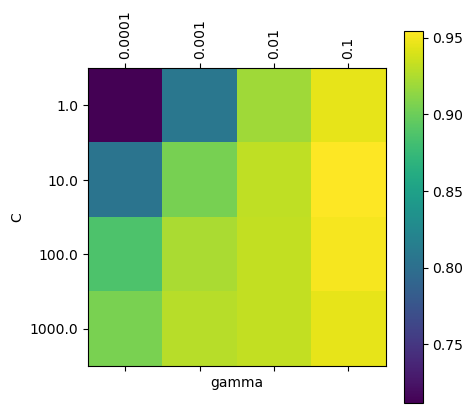

In [53]:
# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_clf.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(Cs), len(gammas))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gammas)), gammas,rotation='vertical')
plt.yticks(np.arange(len(Cs)), Cs)
plt.show()

In [54]:
# Training model with the best parameters
rbf_os_svc = SVC(C=bestparams['C'], gamma=bestparams['gamma'], kernel='rbf')
rbf_os_svc.fit(X_train, y_train)

rbf_os_pred = rbf_os_svc.predict(X_test)

print("Confusion matrix on test set:\n", metrics.confusion_matrix(y_test, rbf_os_pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(y_test, rbf_os_pred))
print("\nNumber of supports: ",np.sum(rbf_os_svc.n_support_), "(",np.sum(np.abs(rbf_os_svc.dual_coef_)==bestparams['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(rbf_os_svc.n_support_)/X_train.shape[0])

Confusion matrix on test set:
 [[9805  645]
 [ 719  589]]

Accuracy on test set:  0.8839938765096105

Number of supports:  9756 ( 3180 of them have slacks)
Prop. of supports:  0.20007382798080472


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rbf_os_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10450
           1       0.48      0.45      0.46      1308

    accuracy                           0.88     11758
   macro avg       0.70      0.69      0.70     11758
weighted avg       0.88      0.88      0.88     11758



# Trying all possible combinations for best kernel and parameters
This cell is extremely computationally costly. It'll take a lot of time. Execute this with caution.

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create a dictionary of possible parameters
params_grid = {'C': Cs,
               'gamma': gammas,
               'kernel':['linear','rbf', 'poly'],
               'degree': [2, 3] }

if os.path.isfile('trained/svc_all.plk'):
    grid_clf = joblib.load('trained/svc_all.plk')
else:
    #Create the GridSearchCV object
    grid_clf = GridSearchCV(SVC(cache_size=3500), params_grid)
    
    #Fit the data with the best possible parameters
    grid_clf.fit(X_train, y_train)
    joblib.dump(grid_clf, 'trained/svc_all.plk')

#Print the best estimator with it's parameters
print(grid_clf.best_estimators)